In [10]:
from collections import defaultdict
import json
import os
from matplotlib import rcParams
from matplotlib import pyplot as plt
import matplotlib.backends.backend_pdf
import numpy as np

In [11]:
data_dir_bo = 'bo/'
data_dir_simplex = 'simplex/'
# data_dir = '/home/ws/zx5016/Dropbox/KIT/xfel/ocelot_data_2'
plot_dir = './'


In [12]:
def compare_ojectives(file_bo, file_simplex, key):
    data_file_bo = open(os.path.join(data_dir_bo, file_bo))
    data_bo = json.load(data_file_bo)
    data_file_simplex = open(os.path.join(data_dir_simplex, file_simplex))
    data_simplex = json.load(data_file_simplex)

    fig, ax = plt.subplots(figsize=(10, 5))
    plt.plot(data_bo['Y'], label='BO')
    plt.plot(data_simplex['obj_values'], label='Simplex')
    plt.ylabel(data_bo['metadata']['objective'])
    plt.xlabel('Steps')
    plt.grid()
    plt.legend()
    plt.title(key)

    return fig


In [13]:
file_dict = defaultdict()
file_dict['air_coils_2'] = ['benchmark_ucb_2022_11_24-08_56_30.json', '2022-11-24 09-04-27.json']
file_dict['air_coils_4'] = ['benchmark_ucb_2022_11_24-09_11_00.json', '2022-11-24 09-19-20.json']
file_dict['air_coils_6'] = ['benchmark_ucb_2022_11_24-09_21_33.json', '2022-11-24 09-34-23.json']
file_dict['air_coils_8'] = ['benchmark_ucb_2022_11_24-09_44_46.json', '2022-11-24 10-01-07.json']
file_dict['air_coils_10'] = ['benchmark_ucb_2022_11_24-10_13_49.json', '2022-11-24 10-31-55.json']

In [14]:
pdf = matplotlib.backends.backend_pdf.PdfPages(os.path.join(plot_dir, '2022-11-24-xfel-comparison.pdf'))
for k in file_dict.keys():
    fig = compare_ojectives(file_dict[k][0], file_dict[k][1], k)
    pdf.savefig(fig, bbox_inches='tight')
    plt.clf()
pdf.close()

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [24]:
def get_plot(data_simplex, title):
    fig, ax = plt.subplots(figsize=(15, 8))

    actuators = np.arange(np.shape(data_dict['X'])[1])
    x = np.array(data_dict['X'])
    for a in actuators:
        ax.plot(x[:,a], label=data_dict['metadata']['input'][a])
        
    ax2 = ax.twinx() 
    ax2.plot(data_simplex['obj_values'], color='black', linewidth=3 )
    ax2.set_ylabel(data_simplex["function"].split()[-1])
    # ax2.set_ylabel(data_dict['metadata']['objective'])

    ax.set_xlabel('Steps')
    ax.grid(True)
    ax.legend(framealpha=1)
    plt.title(title)

    return fig


KeyError: 'X'

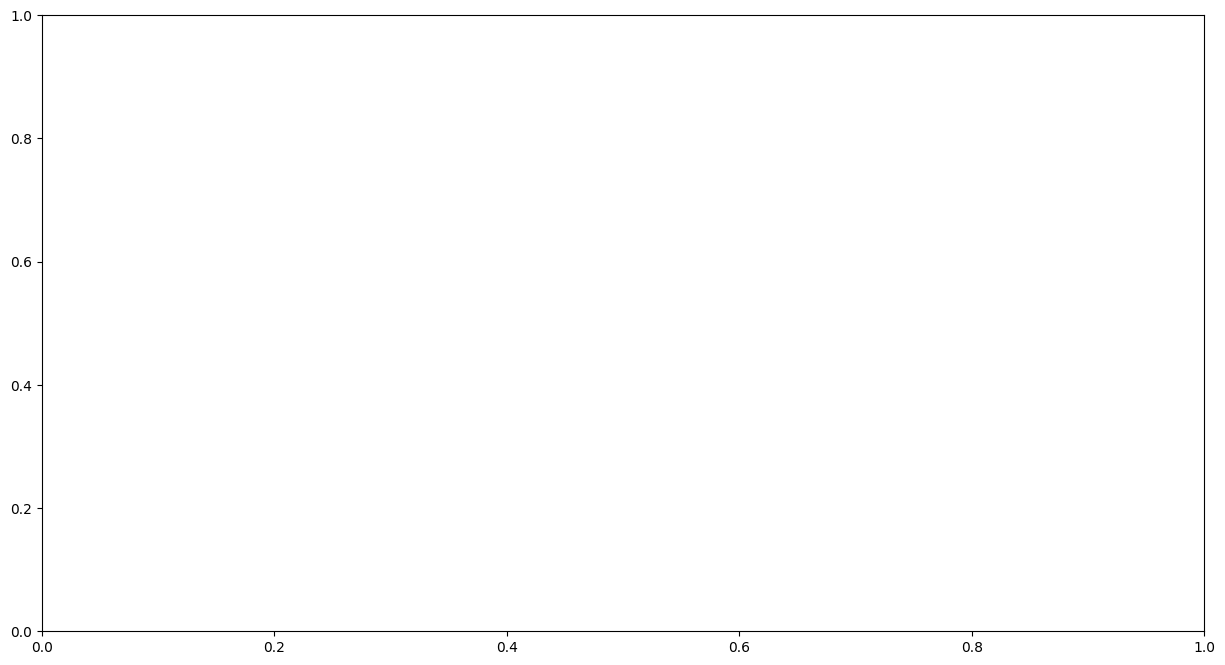

In [26]:
pdf = matplotlib.backends.backend_pdf.PdfPages(os.path.join(plot_dir, '2022-11-24-xfel-simplex.pdf'))
for subdir, dirs, files in os.walk(data_dir_simplex):
    for f in sorted(files):
        if f.endswith('.json'):
            data_file = open(os.path.join(data_dir_simplex, f))
            data = json.load(data_file)
            timestamp = f.strip('.json')
            fig = get_plot(data, timestamp)
            pdf.savefig(fig, bbox_inches='tight')
            plt.clf()
pdf.close()

In [17]:
import glob
f_list = glob.glob("simplex/*")
filename = f_list[0].split("/")[1]

In [27]:
with open(f_list[0], "r") as f:
    data_simplex1 = json.load(f)

In [28]:
data_simplex1.keys()

dict_keys(['XFEL.FEL/UNDULATOR.SASE1/CAX.CELL3.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL3.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL7.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAX.CELL8.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAX.CELL14.SA1/FIELD.OFFSET', 'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL14.SA1/FIELD.OFFSET', 'method', 'dev_times', 'obj_times', 'maximization', 'nreadings', 'function', 'beam_energy', 'wavelength', 'obj_values', 'std', 'ref_sase', 'charge'])

In [30]:
data_simplex1["function"].split()[-1]

'XFEL.FEL/XGM/XGM.2643.T9/INTENSITY.SA1.RAW.TRAIN'